# CARA 1 (DIGABUNG)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
df1 = pd.read_csv('./data/diabetes/diabetes_012_health_indicators_BRFSS2015.csv')
df2 = pd.read_csv('./data/diabetes/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df3 = pd.read_csv('./data/diabetes/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
df1 = df1.drop(columns=['HighBP','HighChol','CholCheck','Stroke','HeartDiseaseorAttack','Fruits','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Education','Income'])

In [4]:
df1.rename(columns={'Diabetes_012': 'Diabetes_binary'}, inplace=True)

In [5]:
df2 = df2.drop(columns=['HighBP','HighChol','CholCheck','Stroke','HeartDiseaseorAttack','Fruits','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Education','Income'])

In [6]:
df3 = df3.drop(columns=['HighBP','HighChol','CholCheck','Stroke','HeartDiseaseorAttack','Fruits','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Education','Income'])

In [7]:
df1['Diabetes_binary'].replace(2, 1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30396\3702795627.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Diabetes_binary'].replace(2, 1, inplace=True)


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes_binary    253680 non-null  float64
 1   BMI                253680 non-null  float64
 2   Smoker             253680 non-null  float64
 3   PhysActivity       253680 non-null  float64
 4   Veggies            253680 non-null  float64
 5   HvyAlcoholConsump  253680 non-null  float64
 6   Sex                253680 non-null  float64
 7   Age                253680 non-null  float64
dtypes: float64(8)
memory usage: 15.5 MB


In [9]:
df1['Diabetes_binary'].unique()

array([0., 1.])

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diabetes_binary    70692 non-null  float64
 1   BMI                70692 non-null  float64
 2   Smoker             70692 non-null  float64
 3   PhysActivity       70692 non-null  float64
 4   Veggies            70692 non-null  float64
 5   HvyAlcoholConsump  70692 non-null  float64
 6   Sex                70692 non-null  float64
 7   Age                70692 non-null  float64
dtypes: float64(8)
memory usage: 4.3 MB


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes_binary    253680 non-null  float64
 1   BMI                253680 non-null  float64
 2   Smoker             253680 non-null  float64
 3   PhysActivity       253680 non-null  float64
 4   Veggies            253680 non-null  float64
 5   HvyAlcoholConsump  253680 non-null  float64
 6   Sex                253680 non-null  float64
 7   Age                253680 non-null  float64
dtypes: float64(8)
memory usage: 15.5 MB


In [12]:
df_overall = pd.concat([df1, df2, df3], ignore_index=True)
print(df_overall.head())

   Diabetes_binary   BMI  Smoker  PhysActivity  Veggies  HvyAlcoholConsump  \
0              0.0  40.0     1.0           0.0      1.0                0.0   
1              0.0  25.0     1.0           1.0      0.0                0.0   
2              0.0  28.0     0.0           0.0      0.0                0.0   
3              0.0  27.0     0.0           1.0      1.0                0.0   
4              0.0  24.0     0.0           1.0      1.0                0.0   

   Sex   Age  
0  0.0   9.0  
1  0.0   7.0  
2  0.0   9.0  
3  0.0  11.0  
4  0.0  11.0  


In [13]:
df_zero_diabetes = df_overall[df_overall['Diabetes_binary'] == 0]
print(df_zero_diabetes.head()) 
df_one_diabetes = df_overall[df_overall['Diabetes_binary'] == 1]
print(df_one_diabetes.head()) 

   Diabetes_binary   BMI  Smoker  PhysActivity  Veggies  HvyAlcoholConsump  \
0              0.0  40.0     1.0           0.0      1.0                0.0   
1              0.0  25.0     1.0           1.0      0.0                0.0   
2              0.0  28.0     0.0           0.0      0.0                0.0   
3              0.0  27.0     0.0           1.0      1.0                0.0   
4              0.0  24.0     0.0           1.0      1.0                0.0   

   Sex   Age  
0  0.0   9.0  
1  0.0   7.0  
2  0.0   9.0  
3  0.0  11.0  
4  0.0  11.0  
    Diabetes_binary   BMI  Smoker  PhysActivity  Veggies  HvyAlcoholConsump  \
8               1.0  30.0     1.0           0.0      1.0                0.0   
10              1.0  25.0     1.0           1.0      1.0                0.0   
13              1.0  28.0     0.0           0.0      1.0                0.0   
17              1.0  23.0     1.0           1.0      0.0                0.0   
23              1.0  27.0     0.0           1.

In [14]:
unique_values = df_overall['Diabetes_binary'].value_counts()
print("Nilai unik pada kolom 'Diabetes_binary' dan jumlahnya:")
print(unique_values)

Nilai unik pada kolom 'Diabetes_binary' dan jumlahnya:
Diabetes_binary
0.0    467383
1.0    110669
Name: count, dtype: int64


In [17]:
print('Semua Kolom')
print(df_overall.columns)
print("Jumlah nilai null di setiap kolom:")
print(df_overall.isnull().sum())
duplicate_rows = df_overall.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

Semua Kolom
Index(['Diabetes_binary', 'BMI', 'Smoker', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'Sex', 'Age'],
      dtype='object')
Jumlah nilai null di setiap kolom:
Diabetes_binary      0
BMI                  0
Smoker               0
PhysActivity         0
Veggies              0
HvyAlcoholConsump    0
Sex                  0
Age                  0
dtype: int64
Jumlah baris duplikat: 0


In [16]:
df_overall = df_overall.drop_duplicates()

# Memeriksa kembali apakah masih ada duplikat
duplicate_rows_after = df_overall.duplicated().sum()
print(f"Jumlah baris duplikat setelah penghapusan: {duplicate_rows_after}")
len(df_overall)

Jumlah baris duplikat setelah penghapusan: 0


16664

In [18]:
df_zero_diabetes = df_overall[df_overall['Diabetes_binary'] == 0]
print(df_zero_diabetes.head()) 
df_one_diabetes = df_overall[df_overall['Diabetes_binary'] == 1]
print(df_one_diabetes.head()) 

   Diabetes_binary   BMI  Smoker  PhysActivity  Veggies  HvyAlcoholConsump  \
0              0.0  40.0     1.0           0.0      1.0                0.0   
1              0.0  25.0     1.0           1.0      0.0                0.0   
2              0.0  28.0     0.0           0.0      0.0                0.0   
3              0.0  27.0     0.0           1.0      1.0                0.0   
4              0.0  24.0     0.0           1.0      1.0                0.0   

   Sex   Age  
0  0.0   9.0  
1  0.0   7.0  
2  0.0   9.0  
3  0.0  11.0  
4  0.0  11.0  
    Diabetes_binary   BMI  Smoker  PhysActivity  Veggies  HvyAlcoholConsump  \
8               1.0  30.0     1.0           0.0      1.0                0.0   
10              1.0  25.0     1.0           1.0      1.0                0.0   
13              1.0  28.0     0.0           0.0      1.0                0.0   
17              1.0  23.0     1.0           1.0      0.0                0.0   
23              1.0  27.0     0.0           1.

## Heatmap

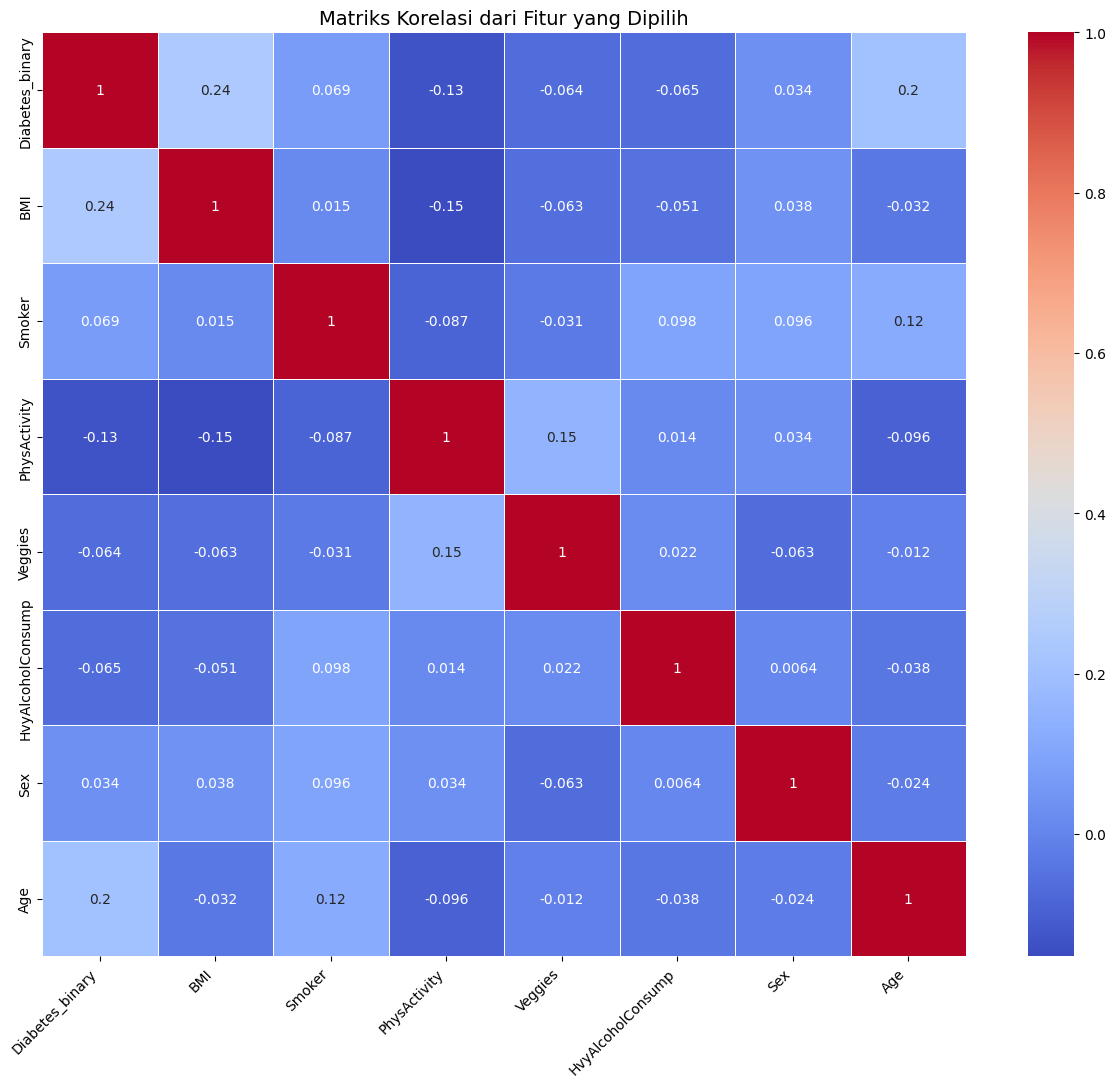

In [18]:
corr_matrix = df_overall.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.xticks(rotation=45, ha='right')
plt.title('Matriks Korelasi dari Fitur yang Dipilih', fontsize=14)
plt.show()

In [19]:
summary_df = pd.DataFrame({
    'Column': df_overall.columns,
    'Max': df_overall.max().values,
    'Min': df_overall.min().values
})
summary_df

,Column,Max,Min
0,Diabetes_binary,1.0,0.0
1,BMI,98.0,12.0
2,Smoker,1.0,0.0
3,PhysActivity,1.0,0.0
4,Veggies,1.0,0.0
5,HvyAlcoholConsump,1.0,0.0
6,Sex,1.0,0.0
7,Age,13.0,1.0


In [20]:
print('df1')
for col in df_overall.columns:
    print(f"{col}: {df_overall[col].unique()}")

df1
Diabetes_binary: [0. 1.]
BMI: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker: [1. 0.]
PhysActivity: [0. 1.]
Veggies: [1. 0.]
HvyAlcoholConsump: [0. 1.]
Sex: [0. 1.]
Age: [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]


## SPLIT DATA

In [19]:
data_array = df_overall.to_numpy()
labels = data_array[:, 0]  
features = data_array[:, 1:]
x_train, x_remaining, y_train, y_remaining = train_test_split(features, labels, test_size=0.4, random_state=42)
x_cv, x_test, y_cv, y_test = train_test_split(x_remaining, y_remaining, test_size=0.5, random_state=42)
y_train = y_train.reshape(-1, 1)
y_cv = y_cv.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_cv shape: {x_cv.shape}, y_cv shape: {y_cv.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (9998, 7), y_train shape: (9998, 1)
x_cv shape: (3333, 7), y_cv shape: (3333, 1)
x_test shape: (3333, 7), y_test shape: (3333, 1)


In [20]:
df_overall.columns.tolist()

['Diabetes_binary',
 'BMI',
 'Smoker',
 'PhysActivity',
 'Veggies',
 'HvyAlcoholConsump',
 'Sex',
 'Age']

In [21]:
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(x_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # or try 0.0001
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
print(y_train.shape)
print(x_train.shape)

(9998, 1)
(9998, 7)


In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [25]:
history = model.fit(x_train, y_train, validation_data=(x_cv, y_cv), epochs=50, callbacks=[early_stopping])

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5492 - loss: 0.8960 - val_accuracy: 0.5977 - val_loss: 0.6692
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5707 - loss: 0.7598 - val_accuracy: 0.5734 - val_loss: 0.6771
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5905 - loss: 0.7123 - val_accuracy: 0.5773 - val_loss: 0.6743
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5952 - loss: 0.6975 - val_accuracy: 0.6271 - val_loss: 0.6667
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5986 - loss: 0.6906 - val_accuracy: 0.6283 - val_loss: 0.6643
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5987 - loss: 0.6859 - val_accuracy: 0.6283 - val_loss: 0.6652
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6141 - loss: 0.6704 - val_accuracy: 0.6283 - val_loss: 0.6625
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6192 - loss: 0.6647 - val_accuracy: 0.

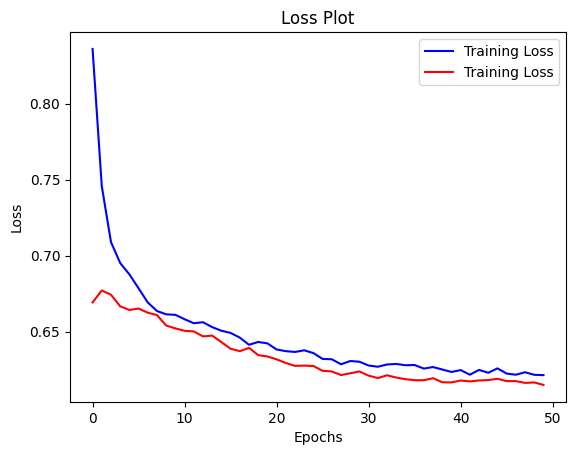

In [26]:
plt.title('Loss Plot')
plt.plot(history.history['loss'],'b', label='Training Loss')
plt.plot(history.history['val_loss'],'r',label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
def predict_diabetes(model, input_data):
    # Melakukan prediksi untuk mendapatkan probabilitas risiko diabetes
    prob = model.predict(input_data)[:, 0]  # Probabilitas kelas 0 (Negatif) atau 1 (Positif)

    status = 'Positif' if prob >= 0.5 else 'Negatif' 
    
    return status, prob[0]

In [33]:
sample_input_1 = np.array([[40.,  1.,  0.,  1.,  0.,  0., 9.]])   # Kombinasi dengan age = 12
sample_input_2 = np.array([[24.,  0.,  1.,  1.,  0.,  0., 11.]])   # Kombinasi dengan age = 13
sample_input_3 = np.array([[28.,  0.,  0.,  1.,  0.,  0., 11.]])   # Kombinasi dengan age = 11
sample_input_4 = np.array([[27.,  0.,  1.,  1.,  0.,  1., 7.]])   # Kombinasi dengan age = 10

# Menggunakan model untuk memprediksi
status_1, prob_1 = predict_diabetes(model, sample_input_1)
status_2, prob_2 = predict_diabetes(model, sample_input_2)
status_3, prob_3 = predict_diabetes(model, sample_input_3)
status_4, prob_4 = predict_diabetes(model, sample_input_4)

# Menampilkan hasil
print(f"Sample 1 - Probabilitas risiko diabetes: {prob_1:.4f}, Status: {status_1}")
print(f"Sample 2 - Probabilitas risiko diabetes: {prob_2:.4f}, Status: {status_2}")
print(f"Sample 3 - Probabilitas risiko diabetes: {prob_3:.4f}, Status: {status_3}")
print(f"Sample 4 - Probabilitas risiko diabetes: {prob_4:.4f}, Status: {status_4}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Sample 1 - Probabilitas risiko diabetes: 0.4607, Status: Negatif
Sample 2 - Probabilitas risiko diabetes: 0.4346, Status: Negatif
Sample 3 - Probabilitas risiko diabetes: 0.4494, Status: Negatif
Sample 4 - Probabilitas risiko diabetes: 0.4421, Status: Negatif


In [105]:
print(df_overall.columns)

Index(['Diabetes_binary', 'BMI', 'Smoker', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'Sex', 'Age'],
      dtype='object')


In [29]:
'''
def asking():
    nama = input('Masukkan Nama Anda: ')
    gender = 1 if input('Masukkan Jenis Kelamin Anda (L/P): ').lower() == 'l' else 0
    usia = int(input('Masukkan Usia Anda: '))
    berat = int(input('Masukkan berat badan Anda: '))
    smoke = 1 if input('Apakah Anda Merokok (YA/TIDAK)? ').lower() == 'ya' else 0
    bloo_pr = 1 if input('Tekanan Darah Anda Tinggi Atau Rendah (YA/TIDAK)? ').lower() == 'ya' else 0
    stroke = 1 if input('Apakah Anda Memiliki Stroke (YA/TIDAK)? ').lower() == 'ya' else 0
    heart = 1 if input('Apakah Anda Memiliki Riwayat Penyakit Jantung (YA/TIDAK)? ').lower() == 'ya' else 0
    colesterol = 1 if input('Apakah Anda Memiliki Kolesterol (YA/TIDAK)? ').lower() == 'ya' else 0
    inheritance_mapping = {
        "lebih dari 3": 5,
        "3 orang": 4,
        "2 orang": 3,
        "1 orang": 2,
        "tidak ada": 1
    }
    inheritance_input = input('Apakah Keluarga Anda Memiliki Riwayat Diabetes? Jika ada, berapa orang (Lebih Dari 3/3 Orang/2 Orang/1 Orang/Tidak Ada)? ').lower()
    inheritance = inheritance_mapping.get(inheritance_input, 1)
    alcoholic = 1 if input('Apakah Anda Pengkonsumsi Alkohol (YA/TIDAK)? ').lower() == 'ya' else 0
    fruit = 1 if input('Apakah Anda Sering Mengkonsumsi Buah-Buahan (YA/TIDAK)? ').lower() == 'ya' else 0
    vegetable = 1 if input('Apakah Anda Sering Mengkonsumsi Sayur-Sayuran (YA/TIDAK)? ').lower() == 'ya' else 0
    phys_acc = 1 if input('Sehari-hari, apakah Anda melakukan aktivitas fisik (YA/TIDAK)? ').lower() == 'ya' else 0
    diffwalk = 1 if input('Sehari-hari, apakah Anda ada naik kendaraan (YA/TIDAK)? ').lower() == 'ya' else 0
    print(f"Nama: {nama}, Gender: {gender}, Usia: {usia},Berat: {berat}, Smoke: {smoke}, Blood Pressure: {bloo_pr}, Stroke: {stroke}, "
          f"Heart Disease: {heart}, Cholesterol: {colesterol}, Inheritance: {inheritance}, Alcoholic: {alcoholic}, "
          f"Fruit: {fruit}, Vegetable: {vegetable}, Physical Activity: {phys_acc}, Difficulty Walking: {diffwalk}")
    return (bloo_pr, colesterol, berat, smoke, stroke, heart, phys_acc, fruit, vegetable, alcoholic, inheritance, diffwalk,gender)
'''

'\ndef asking():\n    nama = input(\'Masukkan Nama Anda: \')\n    gender = 1 if input(\'Masukkan Jenis Kelamin Anda (L/P): \').lower() == \'l\' else 0\n    usia = int(input(\'Masukkan Usia Anda: \'))\n    berat = int(input(\'Masukkan berat badan Anda: \'))\n    smoke = 1 if input(\'Apakah Anda Merokok (YA/TIDAK)? \').lower() == \'ya\' else 0\n    bloo_pr = 1 if input(\'Tekanan Darah Anda Tinggi Atau Rendah (YA/TIDAK)? \').lower() == \'ya\' else 0\n    stroke = 1 if input(\'Apakah Anda Memiliki Stroke (YA/TIDAK)? \').lower() == \'ya\' else 0\n    heart = 1 if input(\'Apakah Anda Memiliki Riwayat Penyakit Jantung (YA/TIDAK)? \').lower() == \'ya\' else 0\n    colesterol = 1 if input(\'Apakah Anda Memiliki Kolesterol (YA/TIDAK)? \').lower() == \'ya\' else 0\n    inheritance_mapping = {\n        "lebih dari 3": 5,\n        "3 orang": 4,\n        "2 orang": 3,\n        "1 orang": 2,\n        "tidak ada": 1\n    }\n    inheritance_input = input(\'Apakah Keluarga Anda Memiliki Riwayat Diabetes

In [16]:
'''
hasil_input = np.array(asking()).astype('float32').reshape(1, -1)
print("\nArray hasil input:\n", hasil_input)
'''

KeyboardInterrupt: Interrupted by user

In [ ]:
prediction = model.predict([])
predicted_prob = prediction[0]

if predicted_prob[0] >= 0.5:
    diagnosis = "Diabetes"
else:
    diagnosis = "Tidak Diabetes"

print("Hasil Prediksi:", diagnosis)